# 3.4 Classifying movie reviews: a binary classification example

## The dataset

In [7]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000) 

In [8]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
train_labels[0]

1

In [10]:
max([max(sequence) for sequence in train_data])

9999

## Preparing the data

Encoding the integer sequences into a binary matrix - one-hot encoding.

In [11]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
x_train.shape

(25000, 10000)

You should also vectorize your labels, which is straightforward.

In [13]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [21]:
y_train.shape

(25000,)

## Building your network

In [15]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [16]:
# Basic model compilation
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [17]:
# Configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
# Using custom losses and metrics
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

## Validating your approach

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])


In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 284us/step - loss: 0.5083 - acc: 0.7823 - val_loss: 0.3786 - val_acc: 0.8688
Epoch 2/20
15000/15000 [==============================] - 2s 151us/step - loss: 0.3001 - acc: 0.9047 - val_loss: 0.3000 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.2177 - acc: 0.9284 - val_loss: 0.3083 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1749 - acc: 0.9439 - val_loss: 0.2841 - val_acc: 0.8835
Epoch 5/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.1425 - acc: 0.9543 - val_loss: 0.2843 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1149 - acc: 0.9650 - val_loss: 0.3170 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0979 - acc: 0.9709 - val_loss: 0.3127 - 

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

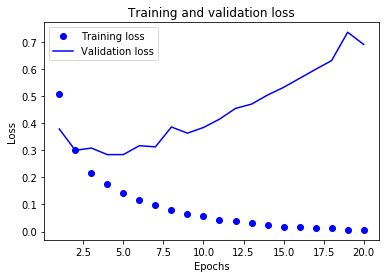

In [28]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(history_dict["acc"]) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

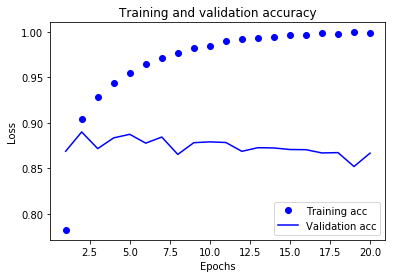

In [31]:
# Plotting the training and validation accuracy
acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [32]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000, )))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.4750 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2655 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 80us/step - loss: 0.1984 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 4s 145us/step


In [33]:
results

[0.32326423828125, 0.87296]

## Using a trained network to generate predictions on new data

In [34]:
model.predict(x_test)

array([[0.13637072],
       [0.9996997 ],
       [0.30782697],
       ...,
       [0.07254783],
       [0.04328145],
       [0.47093564]], dtype=float32)